In [1]:
import numpy as np
import cv2
from sklearn import cluster
import matplotlib.pyplot as plt

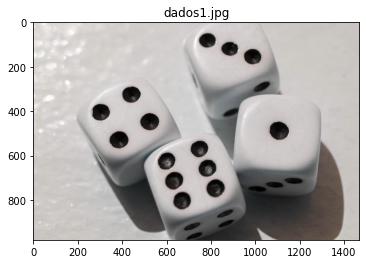

In [2]:
image = cv2.imread('dados1.jpg')
plt.imshow(image)
plt.title('dados1.jpg')
plt.show()

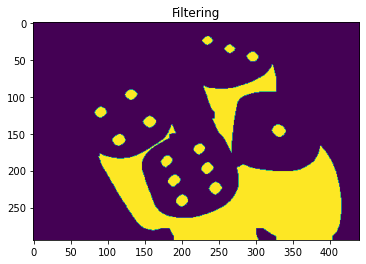

In [3]:
#FILTERING SECTION threshold, blur and erode
#NEED CHANGE SCALE OF IMAGE TO FIT IN SIMILAR PARAMS BLOBS FOR ALL IMAGES
scale_percent = 30
w = int(image.shape[1] * scale_percent /100)
h = int(image.shape[0] * scale_percent /100)
resized = cv2.resize(image, (w,h), interpolation=cv2.INTER_AREA)
image = cv2.blur(resized, (3,3))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, image = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
image = cv2.erode(image, kernel, iterations=2)
plt.imshow(image)
plt.title('Filtering')
plt.show()

In [4]:
#initialize the blob detector
params = cv2.SimpleBlobDetector_Params()
params.blobColor = 255
params.minDistBetweenBlobs = 1
detector = cv2.SimpleBlobDetector_create(params)

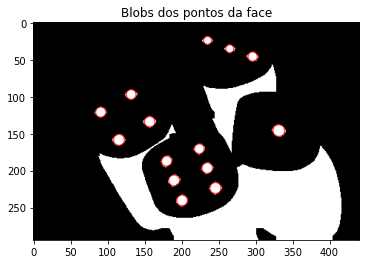

In [5]:
#detect using blob detector
keypoints = detector.detect(image)
img_with_keypoints = cv2.drawKeypoints(
    image, keypoints, np.array([]), (255, 0, 0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.imshow(img_with_keypoints)
plt.title('Blobs dos pontos da face')
plt.show()

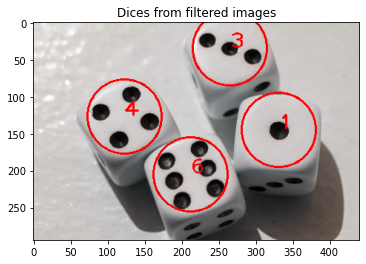

In [6]:
#This part will get all cluster from blobs using heuristic dbscan method
original_img = cv2.imread('dados1.jpg')
X = []
for b in keypoints:
    position = b.pt
    if position != None:
        X.append(position)
X = np.asarray(X)
if len(X)>0:
    clustering = cluster.DBSCAN(eps=50, min_samples=0).fit(X)
    num_dice = max(clustering.labels_) + 1
    for i in range(num_dice):
        X_dice = X[clustering.labels_==i]
        centroid_dice = np.mean(X_dice, axis=0)   
        position = (int(centroid_dice[0]), int(centroid_dice[1]))
        image = cv2.circle(resized, position , 50, (255,0,0), 2)
        cv2.putText(
            resized, str(len(X_dice)), position, cv2.FONT_HERSHEY_PLAIN, 2,
            (255,0,0), 2
        )
plt.imshow(image)
plt.title('Dices from filtered images')
plt.show()